In [1]:

#Realizamos todas las importaciones necesarias, para el desarrollo de nuestro analisis exploratorio de datos, tenemos un conjunto de datos
#que se presentaran acontinuacion, definiremos nuestra variable objetivo, y procederemos a empezar con la limpieza y posterior preprocesado de datos.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import ppscore as pps
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import  GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import (f1_score, roc_auc_score, precision_recall_curve, 
                            roc_curve, confusion_matrix, classification_report, 
                            accuracy_score)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import joblib


from warnings import filterwarnings

filterwarnings("ignore")

# OsityDataSet: Clasificar un usuario en una categoria de obesidad, usando MACHING LEARNING

¿Se podra aportar algo nuevo a la prevencio de la obesidad?
tenemos una clasificacion de tipos de obesidad, y un tipo que se considera "normal" dentro de las clasificaciones, debemos revisar que columnas tienen mas afinidad a la hora de recibir una clasificacion de obesidad, para plantear las graficas correspondientes.
Consideremos las siguientes preguntas basados en investigaciones previas de este tema en especial, para saber si existe un patron especial de caracteristicas, que puedan llevar a la clasificacion en algun tipo de obesidad o por el contrario, falta de peso

Articulo relacionado para nuestra exploracion 
[¿Heredamos la obesidad de nuestros padres?](https://www.bbc.com/mundo/noticias/2015/01/150116_iwonder_nutricion_gordura_genes_finde_ch#:~:text=Este%20incrementa%20el%20antojo%20por,ahora%20identificados%2C%20incluyendo%20el%20FTO.https://www.bbc.com/mundo/noticias/2015/01/150116_iwonder_nutricion_gordura_genes_finde_ch#:~:text=Este%20incrementa%20el%20antojo%20por,ahora%20identificados%2C%20incluyendo%20el%20FTO.)

En el presente Jupyter notebook, se ilustrará el proceso para la obtenición de un modelo preliminar de Machine Learning para la predicción de la probabilidad de clasificacion de una categoria de obesidad. Para esto, se utilizará un dataset .En el presente Jupyter notebook, se ilustrará el proceso para la obtenición de un modelo preliminar

A grandes rasgos, los pasos que se seguirán serán:
1. **Carga y validación de los datos:** Se verifica que los datos a usar sean integrales, que no haya faltantes, que sus valores sean coherentes con la realidad.
2. **Análisis Exploratorio:** Se exploran los datos para detectar posibles interacciones de interés. En el caso de dataset con muchos features, se usaría como base para empezar con los modelos.
3. **Preparación de los datos:** Se realiza preparación y limpieza de datos para los modelos (Normalizar, Estandarizar, Upsampling/Downsampling, generación de datos sintéticos, rellenado de faltantes, entre otras posibilidades). Adicionalmente, se separa un fragmento de los datos para posteriormente probar los modelos en ellos.
4. **Modelado inicial:** Se prueba con algunos modelos básicos. 
5. **Optimización de hiper parámetros**: Se aproxima a la mejor combinación de hiper parámetros del modelo seleccionado para los datos que se tienen. 
6. **Selección del mejor modelo** Con los datos separados en el punto 3, se prueban todos los modelos y se elige aquel con un mejor desempeño.

# Carga y validación de los datos
## Carga y exploración básica a grandes rasgos, los pasos que se seguirán serán:
1. **Carga y validación de los datos:** Se verifica que los datos a usar sean integrales, que no haya faltantes, que sus valores sean coherentes con la realidad.
2. **Análisis Exploratorio:** Se exploran los datos para detectar posibles interacciones de interés. En el caso de dataset con muchos features, se usaría como base para empezar con los modelos.
3. **Preparación de los datos:** Se realiza preparación y limpieza de datos para los modelos (Normalizar, Estandarizar, Upsampling/Downsampling, generación de datos sintéticos, rellenado de faltantes, entre otras posibilidades). Adicionalmente, se separa un fragmento de los datos para posteriormente probar los modelos en ellos.
4. **Modelado inicial:** Se prueba con algunos modelos básicos. 
5. **Optimización de hiper parámetros**: Se aproxima a la mejor combinación de hiper parámetros del modelo seleccionado para los datos que se tienen. 
6. **Selección del mejor modelo** Con los datos separados en el punto 3, se prueban todos los modelos y se elige aquel con un mejor desempeño.


##  exploración básica
Los features del dataset son:
* **gender**:  genero
* **Age**:   edad
* **Height:**  altura
* **wight**: peso 
* **family_history_with_overweight**: si alguno de su historial familiar a tenido sobre peso 
* **FAVC**:   Consumo frecuente de alimentos ricos en calorías
* **FCVC**:  Frecuencia de consumo de verduras
* **NCP**:  Número de comidas principales 
* **CAEC**:  Consumo de alimentos entre comidas.
* **SMOKE**:  si fuma
* **CH2O**:  consumo de litros de agua por dia
* **SCC**:  seguimiento en el consumo de calorias (regular o irregular)
* **FAF**:  frecuencia de actividad fisica (veces por dia)
* **TUE**:  tiempo de uso de dispositivos electronicos
* **CALC**:  frecuencia de consumo alcohol
* **MTRANS**:  medio de trasporte usado(automovil, motocicleta, bicicleta, transporte_publico, caminando)
* **NObeyesdad** :   esta es nuestra variable objetivo y consta de (peso_insuficiente, peso_normal, sobrepeso_nivel1, sobrepeso_nivel2,   obesidad_tipo1, obesidad_tipo2, obesidad_tipo3 )

Se cargan los datos y se validan ciertos elementos, a saber:

*   Que no haya datos faltantes 
*   Que todos los datos sean coherentes con las variables
*   Que la variable respuesta este balanceada 

Después de estas validaciones iniciales, se modifican los nombres de las variables para su interpretabilidad y se realiza un Análisis de Datos Exploratorio para conocer mejor el dataset.

In [35]:
#Cargamos los datos usando pandas
df = pd.read_csv("ObesityDataSet.csv")

In [36]:
#presentamos los 10 primero registros
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [37]:
#si necesitamos cambiar mas de una columna a INT solo debemos agregar su nombre al lado de age dentro del for
#con esto cambiamos la columna age para que sea int y trabajarla perfectamente
for columna in ['Age']:
    df[columna] = df[columna].astype(int)

In [38]:
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [39]:
# Se renombran las variables
# Esto es para dar nombres más interpretables 
df = df.rename(columns={"family_history_with_overweight": "Historial_familiar", 
                        'Gender': 'Genero', 
                        'Age': 'Edad',
                        'FAVC': 'C_rico_calorias',
                        'FCVC': 'F_Consumo_verduras',
                        'NCP':'N_comidas',
                        'CAEC':'Meriendas',
                        'SMOKE':'Fumador',
                        'CH2O': 'Consumo_agua',
                        'SCC': 'Consumo_calorias',
                        'FAF': 'F_actvidad_fisica',
                        'TUE': 'T_uso_dispositivos',
                        'CALC': 'C_alcohol',
                        'MTRANS' : 'Medio_transporte',
                        'NObeyesdad': 'Tipo_obesidad',
                        'Height':  'Altura',
                        'Weight': 'Peso'
                       })

In [40]:
df.head(5)

,Genero,Edad,Altura,Peso,Historial_familiar,C_rico_calorias,F_Consumo_verduras,N_comidas,Meriendas,Fumador,Consumo_agua,Consumo_calorias,F_actvidad_fisica,T_uso_dispositivos,C_alcohol,Medio_transporte,Tipo_obesidad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [41]:
#cambiamos los registros de nuestra variable objetivo, para hacerlos mas entendibles 
i = df[df['Tipo_obesidad'] == 'Obesity_Type_I'].index
i2 = df[df['Tipo_obesidad'] == 'Obesity_Type_II'].index
i3 = df[df['Tipo_obesidad'] == 'Obesity_Type_III'].index
i4 = df[df['Tipo_obesidad'] == 'Normal_Weight'].index
j = df[df['Tipo_obesidad'] == 'Overweight_Level_I'].index
j2 = df[df['Tipo_obesidad'] == 'Overweight_Level_II'].index
j3 = df[df['Tipo_obesidad'] == 'Insufficient_Weight'].index
df.loc[i, 'Tipo_obesidad'] = 'Obesidad_Tipo_I'
df.loc[i2, 'Tipo_obesidad'] = 'Obesidad_Tipo_II'
df.loc[i3, 'Tipo_obesidad'] = 'Obesidad_Tipo_III'
df.loc[i4, 'Tipo_obesidad'] = 'Peso_normal'
df.loc[j, 'Tipo_obesidad'] = 'Sobrepeso_Nivel_I'
df.loc[j2, 'Tipo_obesidad'] = 'Sobrepeso_Nivel_II'
df.loc[j3, 'Tipo_obesidad'] = 'Peso_insuficiente'

# ¿que preguntas puedo sacar de este dataset? 

# Factor clave la columna PESO 

In [42]:
df.groupby('Tipo_obesidad')['Peso'].describe()

,count,mean,std,min,25%,50%,75%,max
Tipo_obesidad,,,,,,,,
Obesidad_Tipo_I,351.0,92.870198,11.485987,75.0,82.140613,90.744965,103.738394,125.0
Obesidad_Tipo_II,297.0,115.305311,8.024320,93.0,112.010504,117.792268,120.805715,130.0
Obesidad_Tipo_III,324.0,120.941114,15.532225,102.0,109.491834,112.049308,133.502780,173.0
Peso_insuficiente,272.0,49.906330,6.010708,39.0,44.656545,50.000000,53.667843,65.0
Peso_normal,287.0,62.155052,9.296031,42.3,55.000000,61.000000,68.500000,87.0
Sobrepeso_Nivel_I,290.0,74.266828,8.470944,53.0,68.151844,75.000000,80.000000,91.0
Sobrepeso_Nivel_II,290.0,82.085271,8.450932,60.0,78.029553,82.000000,86.850322,102.0


## ¿Tendra la edad relacion con la obesidad?

In [10]:
df.pivot_table(index = 'Genero', columns='Tipo_obesidad',aggfunc={'Edad':'mean'})

Edad                                     \
Tipo_obesidad Obesidad_Tipo_I Obesidad_Tipo_II Obesidad_Tipo_III   
Genero                                                             
Female              27.525641        24.500000         23.068111   
Male                23.887179        27.772881         18.000000   

                                                               \
Tipo_obesidad Peso_insuficiente Peso_normal Sobrepeso_Nivel_I   
Genero                                                          
Female                20.109827   22.028369         24.179310   
Male                  18.252525   21.458904         21.972414   

                                  
Tipo_obesidad Sobrepeso_Nivel_II  
Genero                            
Female                  27.00000  
Male                    26.44385

Al parecer la edad es un factor a tener en cuenta, aunque no muestra mucha varianza en los datos con respecto a cada categoria

# ¿Estara la altura relacionada con la obesidad?

In [11]:
df.pivot_table(index = 'Genero', columns='Tipo_obesidad',aggfunc={'Altura':'mean'})

Altura                                     \
Tipo_obesidad Obesidad_Tipo_I Obesidad_Tipo_II Obesidad_Tipo_III   
Genero                                                             
Female               1.607389         1.615000          1.686995   
Male                 1.762936         1.772858          1.870000   

                                                               \
Tipo_obesidad Peso_insuficiente Peso_normal Sobrepeso_Nivel_I   
Genero                                                          
Female                 1.639931    1.607801          1.637225   
Male                   1.780564    1.743014          1.738448   

                                  
Tipo_obesidad Sobrepeso_Nivel_II  
Genero                            
Female                  1.624000  
Male                    1.747673

La altura no muestra una gran diferencia, al parecer no tiene mucho que ver con la variable objetivo 


## ¿Pero que pasa si combinamos todo?

In [12]:
age = pd.cut(df['Edad'],[15,22,50])
heigh = pd.cut(df['Altura'],[1.50,1.70,1.90])
df.pivot_table('Peso', index = ['Genero',age,heigh], columns='Tipo_obesidad')

Tipo_obesidad               Obesidad_Tipo_I  Obesidad_Tipo_II  \
Genero Edad     Altura                                          
Female (15, 22] (1.5, 1.7]        84.501261               NaN   
                (1.7, 1.9]        92.922116               NaN   
       (22, 50] (1.5, 1.7]        80.011620         96.750000   
                (1.7, 1.9]              NaN               NaN   
Male   (15, 22] (1.5, 1.7]        93.628884        104.043010   
                (1.7, 1.9]       103.779915        119.442287   
       (22, 50] (1.5, 1.7]        90.023151        101.246141   
                (1.7, 1.9]       102.653417        117.099077   

Tipo_obesidad               Obesidad_Tipo_III  Peso_insuficiente  Peso_normal  \
Genero Edad     Altura                                                          
Female (15, 22] (1.5, 1.7]         124.968069          44.802986    56.535870   
                (1.7, 1.9]         137.667942          50.691722    61.750000   
       (22, 50] (1.5, 1.7]         108.395243          46.815212    56.411111   
                (1.7, 1.9]         129.362096          51.776834    74.000000   
Male   (15, 22] (1.5, 1.7]                NaN          51.051027    60.072973   
                (1.7, 1.9]         173.000000          55.793200    70.807937   
       (22, 50] (1.5, 1.7]                NaN                NaN    64.416667   
                (1.7, 1.9]                NaN          58.192105    71.940000   

Tipo_obesidad               Sobrepeso_Nivel_I  Sobrepeso_Nivel_II  
Genero Edad     Altura                                             
Female (15, 22] (1.5, 1.7]          65.877981           71.700230  
                (1.7, 1.9]          78.348657           82.118397  
       (22, 50] (1.5, 1.7]          68.644077           76.371446  
                (1.7, 1.9]          79.177924           83.199200  
Male   (15, 22] (1.5, 1.7]          70.509350           79.650165  
                (1.7, 1.9]          83.132331           86.100827  
       (22, 50] (1.5, 1.7]          75.000000           82.598137  
                (1.7, 1.9]          82.689669           88.422131

Aqui se puede observar que estas variables en conjunto, pueden dar valores muy altos en ciertas categorias de la variable objetivo.
por ejemplo para el genero masculino tiene mas presencia en la categoria de Obesidad_Tipo_ll, casocontrario en pasa en la ultima categoria, el genero fememnino tiene mas representacion

array([[<AxesSubplot:title={'center':'Edad'}>,
        <AxesSubplot:title={'center':'Altura'}>,
        <AxesSubplot:title={'center':'Peso'}>],
       [<AxesSubplot:title={'center':'F_Consumo_verduras'}>,
        <AxesSubplot:title={'center':'N_comidas'}>,
        <AxesSubplot:title={'center':'Consumo_agua'}>],
       [<AxesSubplot:title={'center':'F_actvidad_fisica'}>,
        <AxesSubplot:title={'center':'T_uso_dispositivos'}>,
        <AxesSubplot:>]], dtype=object)

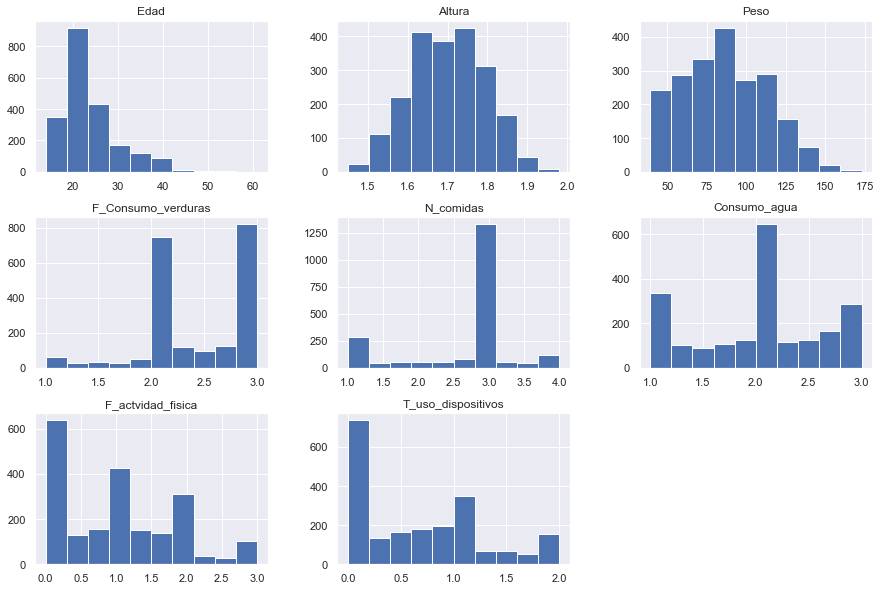

In [13]:
df.hist(figsize=(15,10))

Presentamos los histogramas para cada variable numerica de nuestro dataset, observemos como por lo general el numero de comidas es el habitual (3).
muchos presentan muy poca actividad fisica, esto deriva de que son mas las personas que se encuentran en alguna categoria de obesidad.
la mayoria son jovenes entre los 15 y los 30 años.
la mayoria de pesos se encuentran entre los 50 y 100 kilos 

In [14]:
def heatmap_count(df, var1, var2):
  """Generates a Count heatmap of any two columns of a data frame

  Parameters
  ----------
  df : DataFrame
      El dataframe donde se encuentran nuestras columnas
  var1 : str
      Nombre de una de las columnas (la varibale objetivo deberia ir aqui)
  var2 : str
      El nombre de otra columna de nuestro dataset, diferente a la variable 1
  
  Returns
  -------
  plot : seaborn.heatmap
      A heatmap of the 2 variables agrupadas por conteo
  """

  heat_df=[]
  heat_df=pd.DataFrame(df.groupby([var1,var2]).count().iloc[:,1]).reset_index()
  cols=heat_df.columns
  value=[y for y in cols if y not in [var1, var2]]
  heat_df=heat_df.pivot(columns=var1, index=var2, values=value[0])
  plt.figure(figsize=(15,5))
  return sns.heatmap(heat_df, cmap="Blues",linewidths=0.5, annot=True, fmt='g')


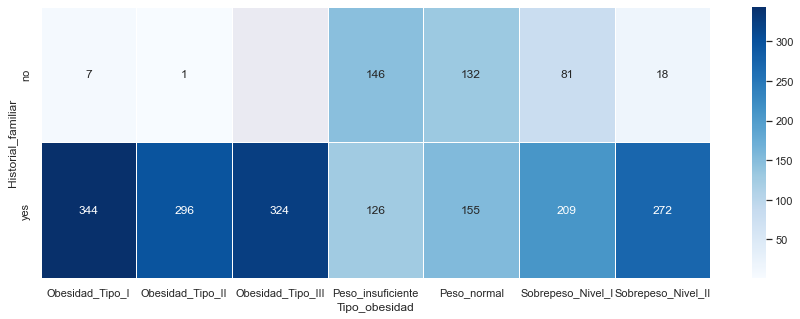

In [15]:
heatmap_count(df, "Tipo_obesidad", "Historial_familiar");

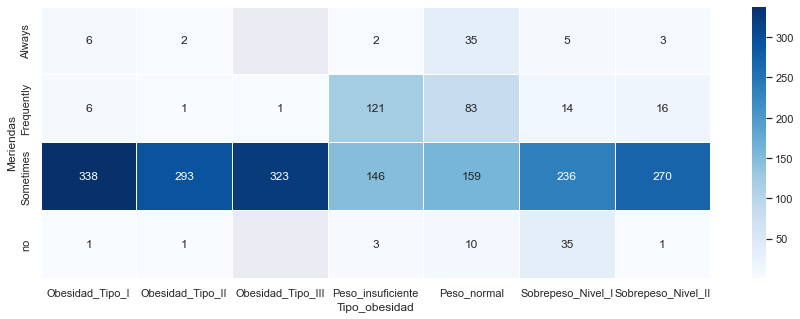

In [16]:
heatmap_count(df, "Tipo_obesidad", "Meriendas");

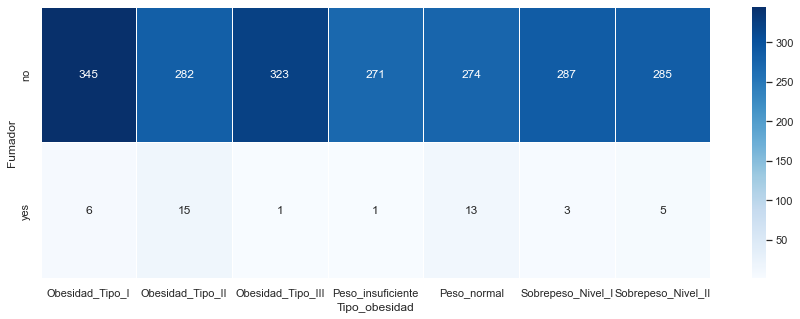

In [17]:
heatmap_count(df, "Tipo_obesidad", "Fumador");

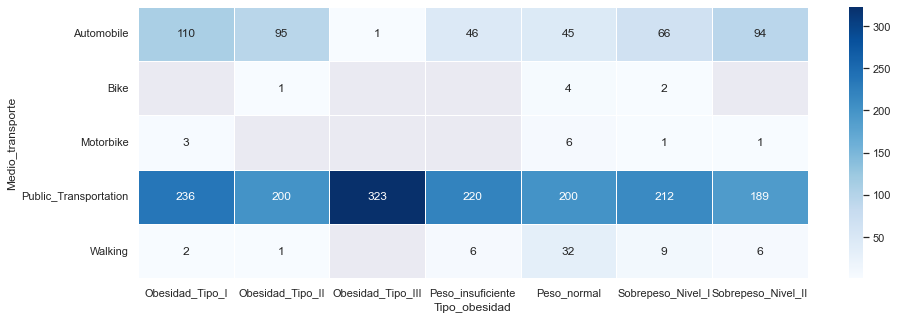

In [18]:
heatmap_count(df, "Tipo_obesidad", "Medio_transporte");

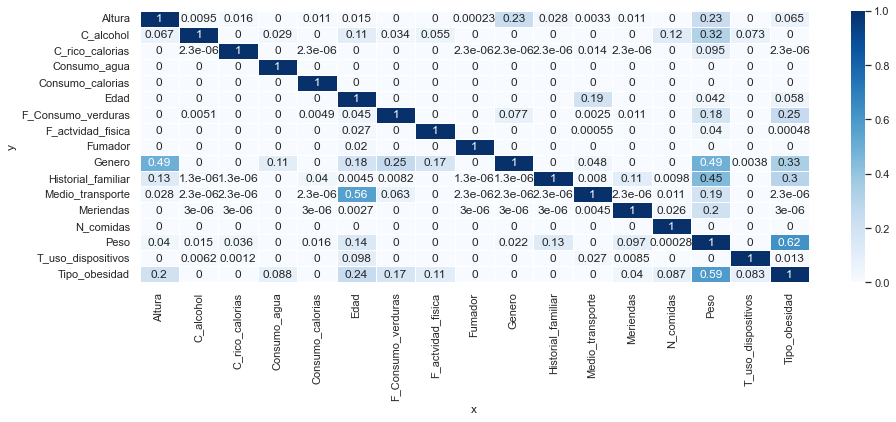

In [19]:
#Se realiza un mapa de calor de Predictive Power Score (PPS).
#El PPS es una métrica que mide el poder predictivo de una variable sobre otra.
#Esta se utiliza para observar correlaciones y posibles variables de interés para los modelos
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize=(15,5))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True);

In [34]:
df.dtypes

Genero                category
Edad                     int32
Altura                 float64
Peso                   float64
Historial_familiar    category
C_rico_calorias         object
F_Consumo_verduras     float64
N_comidas              float64
Meriendas             category
Fumador                 object
Consumo_agua           float64
Consumo_calorias        object
F_actvidad_fisica      float64
T_uso_dispositivos     float64
C_alcohol               object
Medio_transporte        object
Tipo_obesidad         category
dtype: object

In [33]:
#voy a usar: altura, edad, genero, historial familiar, meriendas, peso
df=df.astype({"Genero":"category", "Historial_familiar":"category","Meriendas":"category","Tipo_obesidad":"category"})
df.dtypes

Genero                category
Edad                     int32
Altura                 float64
Peso                   float64
Historial_familiar    category
C_rico_calorias         object
F_Consumo_verduras     float64
N_comidas              float64
Meriendas             category
Fumador                 object
Consumo_agua           float64
Consumo_calorias        object
F_actvidad_fisica      float64
T_uso_dispositivos     float64
C_alcohol               object
Medio_transporte        object
Tipo_obesidad         category
dtype: object

In [43]:
df[['Tipo_obesidad','Edad','Altura','Peso','N_comidas','Consumo_agua','F_actvidad_fisica','F_Consumo_verduras']]

,Tipo_obesidad,Edad,Altura,Peso,N_comidas,Consumo_agua,F_actvidad_fisica,F_Consumo_verduras
0,Peso_normal,21,1.620000,64.000000,3.0,2.000000,0.000000,2.0
1,Peso_normal,21,1.520000,56.000000,3.0,3.000000,3.000000,3.0
2,Peso_normal,23,1.800000,77.000000,3.0,2.000000,2.000000,2.0
3,Sobrepeso_Nivel_I,27,1.800000,87.000000,3.0,2.000000,2.000000,3.0
4,Sobrepeso_Nivel_II,22,1.780000,89.800000,1.0,2.000000,0.000000,2.0
...,...,...,...,...,...,...,...,...
2106,Obesidad_Tipo_III,20,1.710730,131.408528,3.0,1.728139,1.676269,3.0
2107,Obesidad_Tipo_III,21,1.748584,133.742943,3.0,2.005130,1.341390,3.0
2108,Obesidad_Tipo_III,22,1.752206,133.689352,3.0,2.054193,1.414209,3.0
2109,Obesidad_Tipo_III,24,1.739450,133.346641,3.0,2.852339,1.139107,3.0


In [22]:
def get_X_y(df, y_name):
  """
  Divide un DataFrame en X (características) e y (variable de respuesta)
  Parámetros
  ----------
  df : DataFrame
      Un DataFrame que tiene las características de la columna.
  y_name : str
      El nombre de la variable de destino en el DataFrame.

  Devuelve
  -------
  X : DataFrame
      DataFrame con las características utilizadas para predecir y.
  y : Array(int)
      Array con los valores de la variable de respuesta.
  """
  y=[y_name]
  X=[col for col in df.columns if col not in y]
  y=df[y].copy().values.flatten()
  X=pd.get_dummies(df[X].copy())
  return X, y


def data_preprocessing_up_or_down_sample(X, y, sample="up", test_size=0.2):
  """
  Aplica el muestreo descendente o el muestreo ascendente, y devuelve la división Train-Test 
  de los datos.
  Parámetros
  ----------
  X : DataFrame
      DataFrame con las características utilizadas para predecir y.
  y : Array(int)
      Array con los valores de la variable de respuesta.
  sample : str(opcional)
      Elige el método a aplicar. Downsampling ("down"), 
      upsampling ("up") o ningún método (cualquier otro). Por defecto es "up". 
  test_size : float(opcional)
      Establece el parámetro test_size de sklearn.model_selection.train_test_split.
      Por defecto es 0.2
  
  Devuelve
  -------
  división : lista, longitud=2 * len(arrays)
      Lista que contiene la división train-test de las entradas, con el método definido por
      el parámetro sample aplicado.
  """

  # Utilice el parámetro de muestra para definir las variables locales para seleccionar el 
  # método
  a,b=0,0
  if sample=="up": 
    a,b=1,0
  if sample=="down":
    a,b=0,1 

  
  # Aplicar el normal train_test_split a los datos
  X_train, X_test, y_train, y_test = train_test_split( X, y, \
                                        test_size=test_size)
  # Usando las variables locales a y b, aplique downsampling o upsampling sólo
  # si el parámetro de muestreo es "up" o "down".

  if a+b>=1:
    X_train_temp, y_train_temp = resample(X_train[y_train == a],
                                    y_train[y_train == a],
                                    n_samples=X_train[y_train == b].shape[0])
    X_train = np.concatenate((X_train[y_train == b], X_train_temp))
    y_train = np.concatenate((y_train[y_train == b], y_train_temp))
  return (X_train, X_test, y_train, y_test)

def plot_roc_conf_matrix(y_test,X_test, model, model_name):
  """
  Imprime el informe de clasificación y la matriz de confusión 
  para un modelo determinado.

  Argumentos
  ---------
  y_test : {matriz dispersa tipo array} de forma (n_muestras, n_características)
      Valores objetivo
  X_test : {matriz dispersa similar a un array} de forma (n_muestras, n_características)
      Valores de entrada
  modelo : objeto estimador.
      Ya sea de las interfaces sklearn o keras
  model_name : str
      Nombre del modelo. Se utiliza como parte de los títulos del gráfico
  
  """
  try:
    y_pred=model.predict_classes(X_test)
  except:
    y_pred=model.predict(X_test)
  cm = metrics.confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
  plt.title(model_name+ " - Matriz de confusión", y=1.1, \
            fontdict={"fontsize": 21})
  plt.xlabel("Predicted", fontdict={"fontsize": 14})
  plt.ylabel("Actual", fontdict={"fontsize": 14})
 
  print(classification_report(y_test, y_pred))
  plt.subplot(1,2,2)


def apply_model_to_df(data, model, model_name):
  """
  Aplica un estimador sklearn a un DataFrame. 
  Devuelve un modelo ajustado y muestra información relevante del
  rendimiento del modelo (le aplica la función plot_roc_conf_matrix)

  Parámetros
  ----------
  datos : Lista de arrays
      Lista de arrays, equivalente a la salida de la función
      sklearn.model_selection.train_test_split  
  model : objeto estimador.
      Puede ser de las interfaces sklearn o keras
  model_name : str
      Nombre del modelo. Se utiliza como parte de los títulos del gráfico.
  
  Devuelve
  -------
  model : instancia de estimador
      Clasificador ajustado o una tubería ajustada en la que el último estimador 
      es un clasificador.
  """
  X_train, X_test, y_train, y_test=data
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  plot_roc_conf_matrix(y_test,X_test, model, model_name)
  return model

In [44]:
# Se separan los datos
X,y=get_X_y(df[['Tipo_obesidad','Edad','Altura','Peso','N_comidas','Consumo_agua','F_actvidad_fisica','F_Consumo_verduras']], "Tipo_obesidad")
# Se crean conjuntos para probar upsampling, downsampling y sin pre-procesado
data_up = data_preprocessing_up_or_down_sample(X, y ,"up", test_size=0.2)
data_down = data_preprocessing_up_or_down_sample(X, y ,"down", test_size=0.2)
data_as_is= data_preprocessing_up_or_down_sample(X, y ,"None", test_size=0.2)

                    precision    recall  f1-score   support

   Obesidad_Tipo_I       0.95      0.96      0.95        76
  Obesidad_Tipo_II       1.00      0.97      0.99        73
 Obesidad_Tipo_III       1.00      1.00      1.00        55
 Peso_insuficiente       1.00      0.96      0.98        53
       Peso_normal       0.89      0.89      0.89        54
 Sobrepeso_Nivel_I       0.84      0.91      0.88        54
Sobrepeso_Nivel_II       0.91      0.90      0.90        58

          accuracy                           0.94       423
         macro avg       0.94      0.94      0.94       423
      weighted avg       0.94      0.94      0.94       423



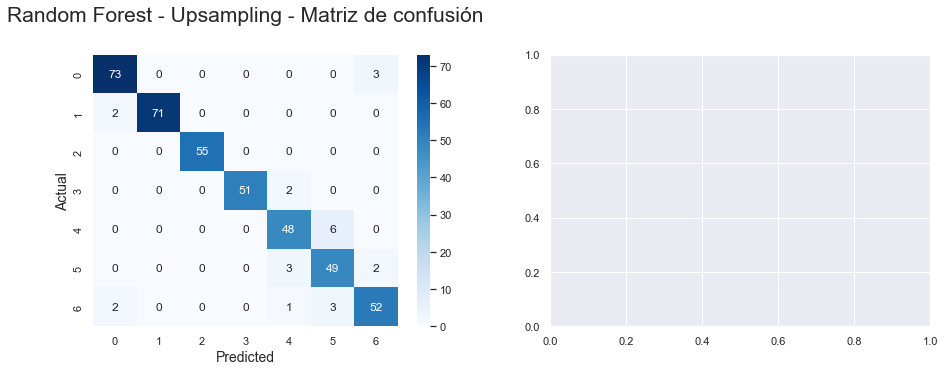

In [45]:
#solo usaremos data_as_is osea datos sin procesar, por que nuestra variable es categorica, no entera.
#si fuera entera podriamos usar los demas preprocesados para mostrar una version mejor a nuestros modelos
rf_asis=apply_model_to_df(data_as_is,RandomForestClassifier(), "Random Forest - Upsampling")

                    precision    recall  f1-score   support

   Obesidad_Tipo_I       0.38      0.30      0.34        76
  Obesidad_Tipo_II       0.75      0.81      0.78        73
 Obesidad_Tipo_III       0.57      0.96      0.72        55
 Peso_insuficiente       0.73      0.87      0.79        53
       Peso_normal       0.48      0.44      0.46        54
 Sobrepeso_Nivel_I       0.36      0.33      0.35        54
Sobrepeso_Nivel_II       0.43      0.21      0.28        58

          accuracy                           0.56       423
         macro avg       0.53      0.56      0.53       423
      weighted avg       0.53      0.56      0.53       423



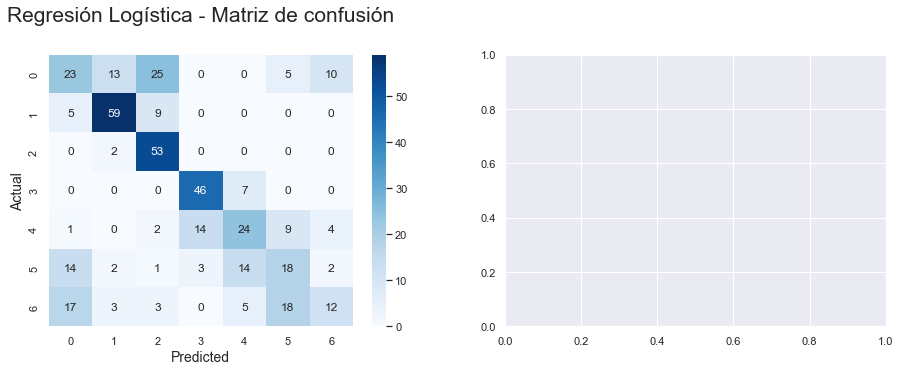

In [46]:
lr_asis=apply_model_to_df(data_as_is,LogisticRegression(class_weight="balanced"), "Regresión Logística")

                    precision    recall  f1-score   support

   Obesidad_Tipo_I       0.82      0.83      0.82        76
  Obesidad_Tipo_II       0.96      0.97      0.97        73
 Obesidad_Tipo_III       0.96      1.00      0.98        55
 Peso_insuficiente       0.79      0.98      0.87        53
       Peso_normal       0.71      0.46      0.56        54
 Sobrepeso_Nivel_I       0.77      0.89      0.83        54
Sobrepeso_Nivel_II       0.75      0.67      0.71        58

          accuracy                           0.83       423
         macro avg       0.82      0.83      0.82       423
      weighted avg       0.83      0.83      0.83       423



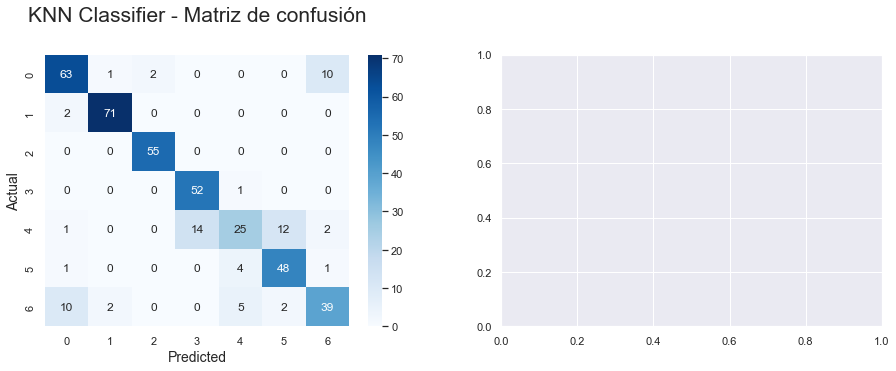

In [47]:
knn_asis=apply_model_to_df(data_as_is,KNeighborsClassifier(), "KNN Classifier")

In [65]:
X,y=get_X_y(df[['Tipo_obesidad','Edad','Altura','Peso','N_comidas','Consumo_agua','F_actvidad_fisica','F_Consumo_verduras']], "Tipo_obesidad")
X_train, X_test, y_train, y_test =data_preprocessing_up_or_down_sample(X, y ,"None", test_size=0.2)

In [66]:
# Guardar los datos no vistos en un archivo separado
unseen_data=pd.DataFrame(X_test, columns=X.columns).copy()
unseen_data["Tipo_obesidad"]=y_test.copy()
unseen_data.to_csv("Test_data.csv")

In [73]:
def pipeline_classifier(X,y,model, param_grid):
  """
  Crea un Pipeline general para los clasificadores sklearn.
  Aplica GridSearchCV para optimizar los hiperparámetros del modelo.

  Parámetros
  ----------
  X : {matriz dispersa, tipo array} de forma (n_muestras, n_características)
      Valores de entrada
  y : {matriz dispersa similar a un array} de forma (n_muestras)
      Valores objetivo
  modelo : objeto sklearn.estimator
      Instancia de un estimador de sklearn.
  param_grid: dict o lista de diccionarios
      Diccionario con nombres de parámetros (str) como claves y listas de ajustes de parámetros 
      parámetros a probar como valores, o una lista de tales diccionarios, en cuyo caso 
      se exploran las cuadrículas abarcadas por cada diccionario de la lista. 
      Esto permite buscar sobre cualquier secuencia de ajustes de parámetros.
    
  Devuelve
  -------
  modelo : instancia de sklearn.estimator
      Clasificador ajustado o una tubería ajustada en la que el último estimador 
      es un clasificador
  """
  pipe = make_pipeline(StandardScaler(), model)
  clf= GridSearchCV(pipe,
                    param_grid=param_grid,
                    cv=10,
                    refit=True,
                    scoring="f1",
                    n_jobs=-1)
  clf.fit(X,y)
  return clf


In [74]:
rf_param_grid = {
        "randomforestclassifier__min_samples_leaf": [1, 3, 5, 7],
        "randomforestclassifier__n_estimators": [50,100, 250, 300],
        "randomforestclassifier__criterion": ["gini", "entropy"]}
rf_asis=pipeline_classifier(X_train,y_train,
                          RandomForestClassifier(class_weight="balanced")\
                          ,rf_param_grid )

In [75]:
rf_gs.best_params_

{'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__n_estimators': 50}

                    precision    recall  f1-score   support

   Obesidad_Tipo_I       1.00      0.99      0.99        71
  Obesidad_Tipo_II       1.00      1.00      1.00        64
 Obesidad_Tipo_III       0.99      1.00      0.99        69
 Peso_insuficiente       0.98      0.96      0.97        57
       Peso_normal       0.87      0.95      0.91        56
 Sobrepeso_Nivel_I       0.95      0.85      0.90        47
Sobrepeso_Nivel_II       0.97      0.98      0.97        59

          accuracy                           0.97       423
         macro avg       0.97      0.96      0.96       423
      weighted avg       0.97      0.97      0.97       423



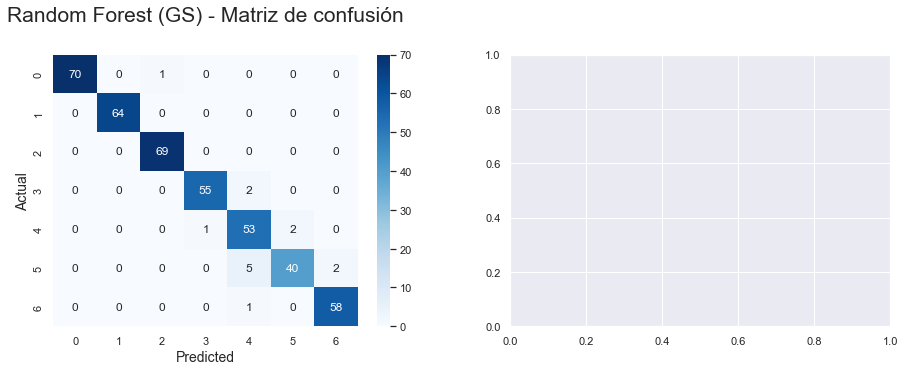

In [76]:
plot_roc_conf_matrix(y_test,X_test, rf_asis, "Random Forest (GS)")

### Nuestro modelo aumento a 97% 

In [77]:
# Se crea una copia de la clase de nuestro pipeline de predicción
model_to_save=rf_asis
# Se agrega el atributo feature_names_
# Este es, un array con los nombres de los features
model_to_save.feature_names_=X.columns.values
# Se agrega el atributo feature_df_.
# Este es, un DataFrame con los Feature y su importancia en el modelo
imp_df=pd.DataFrame(X.T.iloc[:,1])
imp_df[1]=rf_gs.best_estimator_[1].feature_importances_
imp_df=imp_df.rename(columns = {1:'Feature Importance'})\
             .sort_values(by='Feature Importance', ascending=False)\
             .reset_index().rename(columns = {'index':'Feature'})
model_to_save.feature_df_=imp_df

In [78]:
# Se guardan el mejor modelo

joblib.dump(model_to_save, 'ModelRF.pkl')

['ModelRF.pkl']

In [79]:
try:
  final_model=joblib.load('/content/EmployeeTurnover/models/Grid_Search_rf.pkl')

except:
  try:
    final_model=joblib.load("/models/Grid_Search_rf.pkl")
  except:
    final_model=joblib.load("ModelRF.pkl")
    print(f'modelo {final_model} cargado')

modelo GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__criterion': ['gini',
                                                               'entropy'],
                         'randomforestclassifier__min_samples_leaf': [1, 3, 5,
                                                                      7],
                         'randomforestclassifier__n_estimators': [50, 100, 250,
                                                                  300]},
             scoring='f1') cargado


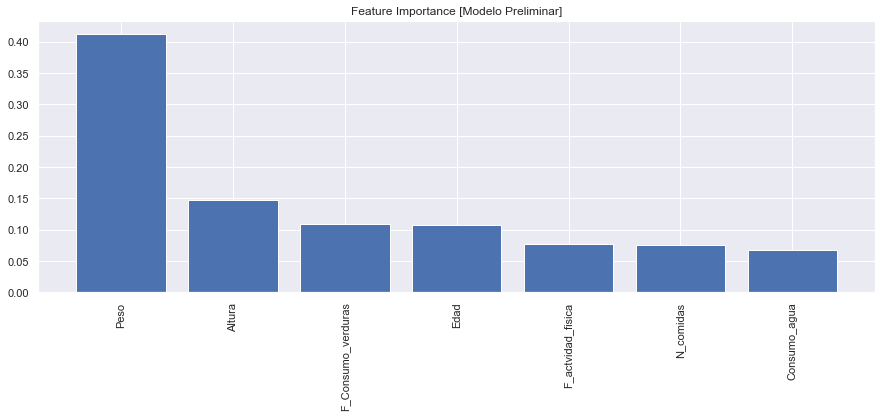

In [80]:
"""
Usando el atributo creado, feature_df_, se genera un gráfico de Feature
Importance del modelo.
"""
plt.figure(figsize=(15, 5))
plt.bar(final_model.feature_df_['Feature'], \
        final_model.feature_df_['Feature Importance'])
_=plt.xticks( rotation=90)
plt.title("Feature Importance [Modelo Preliminar]");

In [81]:
"""
Usando los datos a los que no ha sido expuesto el modelo, y_test y X_test
para simular la exposición a datos a datos nunca vistos.

Se crea un dataframe a partir de estos y realizaremos la predicción
del modelo sobre estos datos y evaluaremos la calidad del modelo.

"""
try:
  test_data_filename="Test_data.csv"
  data_for_test=pd.read_csv(test_data_filename, index_col="Unnamed: 0")

except: 
  test_data_filename='/Test_data.csv'
  data_for_test=pd.read_csv(test_data_filename, index_col="Unnamed: 0")

X_test, y_test=get_X_y(data_for_test,"Tipo_obesidad")
model_test=X_test.copy()
model_test["Tipo_obesidad (Real)"]=y_test
model_test["Tipo_obesidad (Predicted_probability)"]=\
            final_model.predict_proba(model_test.iloc[:,:-1])[:,1]
model_test["Tipo_obesidad (Predicted)"]=\
            final_model.predict(model_test.iloc[:,:-2])
model_test

,Edad,Altura,Peso,N_comidas,Consumo_agua,F_actvidad_fisica,F_Consumo_verduras,Tipo_obesidad (Real),Tipo_obesidad (Predicted_probability),Tipo_obesidad (Predicted)
343,23,1.650000,66.000000,3.000000,2.000000,3.000000,3.000000,Peso_normal,0.00,Peso_normal
1955,26,1.639251,111.927001,3.000000,2.675567,0.000000,3.000000,Obesidad_Tipo_III,0.00,Obesidad_Tipo_III
409,33,1.550000,55.000000,1.000000,3.000000,2.000000,3.000000,Peso_normal,0.00,Peso_normal
465,18,1.600000,51.000000,3.000000,1.000000,1.000000,2.000000,Peso_normal,0.00,Peso_normal
84,25,1.700000,83.000000,3.000000,2.000000,0.000000,2.000000,Sobrepeso_Nivel_II,0.00,Sobrepeso_Nivel_II
...,...,...,...,...,...,...,...,...,...,...
16,27,1.930000,102.000000,1.000000,1.000000,1.000000,2.000000,Sobrepeso_Nivel_II,0.18,Sobrepeso_Nivel_II
674,19,1.567981,41.934368,1.000000,1.676975,0.000000,2.070964,Peso_insuficiente,0.00,Peso_insuficiente
1122,21,1.780679,89.667406,1.471053,2.000000,0.467562,1.780746,Sobrepeso_Nivel_II,0.00,Sobrepeso_Nivel_II
1464,20,1.780791,102.921218,3.000000,1.613829,1.251665,2.000000,Obesidad_Tipo_I,0.00,Obesidad_Tipo_I


In [82]:
model_test.iloc[:,-3:]

,Tipo_obesidad (Real),Tipo_obesidad (Predicted_probability),Tipo_obesidad (Predicted)
343,Peso_normal,0.00,Peso_normal
1955,Obesidad_Tipo_III,0.00,Obesidad_Tipo_III
409,Peso_normal,0.00,Peso_normal
465,Peso_normal,0.00,Peso_normal
84,Sobrepeso_Nivel_II,0.00,Sobrepeso_Nivel_II
...,...,...,...
16,Sobrepeso_Nivel_II,0.18,Sobrepeso_Nivel_II
674,Peso_insuficiente,0.00,Peso_insuficiente
1122,Sobrepeso_Nivel_II,0.00,Sobrepeso_Nivel_II
1464,Obesidad_Tipo_I,0.00,Obesidad_Tipo_I


                    precision    recall  f1-score   support

   Obesidad_Tipo_I       1.00      0.99      0.99        71
  Obesidad_Tipo_II       1.00      1.00      1.00        64
 Obesidad_Tipo_III       0.99      1.00      0.99        69
 Peso_insuficiente       0.98      0.96      0.97        57
       Peso_normal       0.87      0.95      0.91        56
 Sobrepeso_Nivel_I       0.95      0.85      0.90        47
Sobrepeso_Nivel_II       0.97      0.98      0.97        59

          accuracy                           0.97       423
         macro avg       0.97      0.96      0.96       423
      weighted avg       0.97      0.97      0.97       423



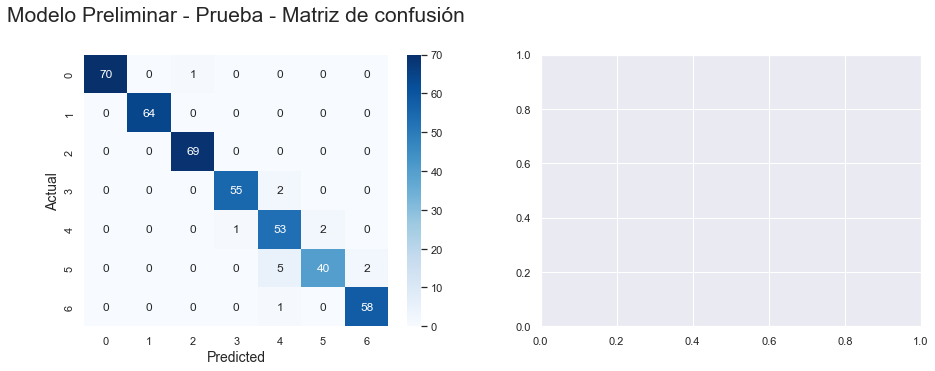

In [83]:
plot_roc_conf_matrix(y_test,X_test, final_model, "Modelo Preliminar - Prueba")